In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use("papers")

In [2]:
# do three figures (merge static stats + dynamics = 9 rows), main paper only segments vs EEG, only 1hr
# supplement: 1hr EEG x VAR, segments x VAR, 20mins just mention is the same (not shown)

In [3]:
data = pd.read_csv("../../results/VAR_ttests.csv", index_col=0)
data["data type"] = data["A"] + " X " + data["B"]
data_sub = data[["T", "p-corr", "var", "VAR length", "Segment length", "data type"]]
data_sub = data_sub[
    data_sub["var"].isin(
        [
            "mixing time",
            "entropy",
            "entropy_rate",
            "AIF 1st peak",
            "var_GFP",
            "coverage",
            "occurrence",
            "lifespan",
            "transition_matrix",
        ]
    )
]

In [4]:
data_sub["data type"] = data_sub["VAR length"].astype(str) + data_sub["data type"]
data_main = data_sub[data_sub["data type"] == "3600.0VAR-segments-mean X real_data"]
data_main

,T,p-corr,var,VAR length,Segment length,data type
2,-3.443831,1.917500e-03,mixing time,3600.0,10.0,3600.0VAR-segments-mean X real_data
2,-5.266505,9.753565e-07,entropy,3600.0,10.0,3600.0VAR-segments-mean X real_data
2,-1.793919,1.362563e-01,entropy_rate,3600.0,10.0,3600.0VAR-segments-mean X real_data
2,-2.498610,3.648002e-02,AIF 1st peak,3600.0,10.0,3600.0VAR-segments-mean X real_data
2,1.304729,3.546941e-01,var_GFP,3600.0,10.0,3600.0VAR-segments-mean X real_data
2,-9.410785,6.245828e-17,coverage,3600.0,10.0,3600.0VAR-segments-mean X real_data
2,-7.332225,1.473024e-11,occurrence,3600.0,10.0,3600.0VAR-segments-mean X real_data
2,-7.861849,1.224057e-12,lifespan,3600.0,10.0,3600.0VAR-segments-mean X real_data
2,-8.372007,5.153707e-14,transition_matrix,3600.0,10.0,3600.0VAR-segments-mean X real_data
2,1.900222,1.078779e-01,mixing time,3600.0,60.0,3600.0VAR-segments-mean X real_data


## main paper - 1hr VAR segments vs EEG

In [5]:
data_T = data_main.pivot(
    columns="Segment length", index=["data type", "var"], values="T"
)
data_p = data_main.pivot(
    columns="Segment length", index=["data type", "var"], values="p-corr"
)
data_T = data_T.rename(
    index={
        "AIF 1st peak": "AIF",
        "entropy_rate": "entropy rate",
        "transition_matrix": "transition matrix",
        "var_GFP": "variance GFP peaks",
        "1200.0VAR-full X VAR-segments-mean": "20min VAR X segments",
        "1200.0VAR-full X real_data": "20min VAR X EEG",
        "1200.0VAR-segments-mean X real_data": "20min segments X EEG",
        "3600.0VAR-full X VAR-segments-mean": "1hr VAR X segments",
        "3600.0VAR-full X real_data": "1hr VAR X EEG",
        "3600.0VAR-segments-mean X real_data": "1hr segments X EEG",
    }
)
data_p = data_p.rename(
    index={
        "AIF 1st peak": "AIF",
        "entropy_rate": "entropy rate",
        "entropy_rate": "entropy rate",
        "transition_matrix": "transition matrix",
        "var_GFP": "variance GFP peaks",
        "1200.0VAR-full X VAR-segments-mean": "20min VAR X segments",
        "1200.0VAR-full X real_data": "20min VAR X EEG",
        "1200.0VAR-segments-mean X real_data": "20min segments X EEG",
        "3600.0VAR-full X VAR-segments-mean": "1hr VAR X segments",
        "3600.0VAR-full X real_data": "1hr VAR X EEG",
        "3600.0VAR-segments-mean X real_data": "1hr segments X EEG",
    }
)
data_p = data_p.applymap(
    lambda x: "".join(["*" for t in [0.001, 0.01, 0.05] if x <= t])
)
data_T.max(), data_T.min()

(Segment length
 10.0     1.304729
 30.0    -1.069535
 60.0     3.722336
 180.0    5.818655
 dtype: float64,
 Segment length
 10.0    -9.410785
 30.0    -6.842880
 60.0    -7.574202
 180.0   -6.627679
 dtype: float64)

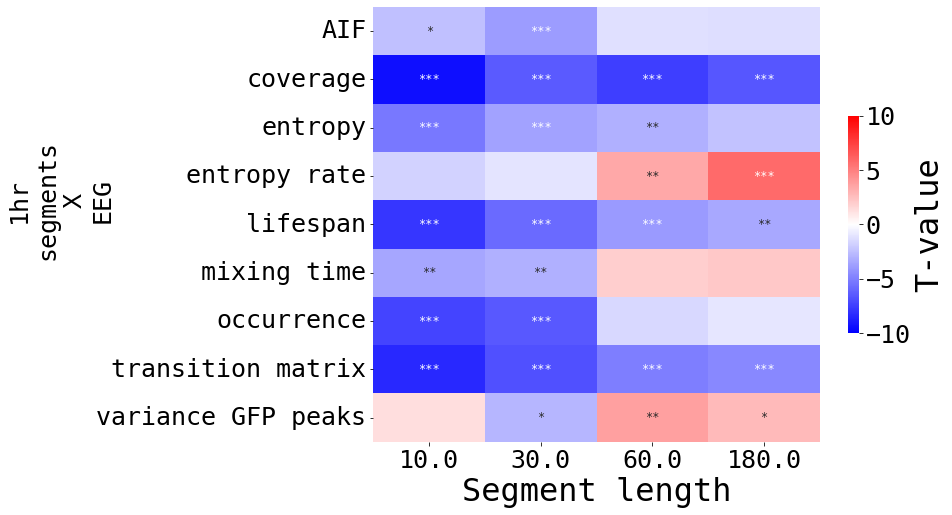

In [6]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
sns.heatmap(
    data_T,
    cbar_kws={"shrink": 0.5, "label": "T-value"},
    cmap="bwr",
    ax=ax,
    vmax=10,
    vmin=-10,
    annot=data_p,
    annot_kws={"size": 12},
    fmt="",
)
ax.set_ylabel("")
_ = ax.set_yticklabels(data_T.index.get_level_values(level=1).tolist(), rotation=0)
shift = int(len(data_T.index.get_level_values(0)) / len(data_T.index.get_level_values(0).unique()))
for pos, idx in enumerate(data_T.index.get_level_values(0).unique()):
    idx = idx.replace(" X ", "\nX\n")
    idx = idx.replace(" ", "\n")
    ax.text(-2.8, pos*shift + shift//2, idx, rotation=90, ha="center", va="center", size=25)
    if pos >= 1:
        ax.plot((0, 4), (pos*shift, pos*shift), "k", linewidth=1.0)

        
plt.savefig("VAR1hr_segments_vs_EEG.pdf", transparent=True, bbox_inches="tight")

## supplement - rest 1hr stuff

In [7]:
data_supp = data_sub[data_sub["data type"].isin(["3600.0VAR-full X VAR-segments-mean", "3600.0VAR-full X real_data"])]
data_supp

,T,p-corr,var,VAR length,Segment length,data type
0,5.070620,4.920594e-06,mixing time,3600.0,10.0,3600.0VAR-full X VAR-segments-mean
1,0.838537,7.383203e-01,mixing time,3600.0,10.0,3600.0VAR-full X real_data
0,7.432192,1.630811e-11,entropy,3600.0,10.0,3600.0VAR-full X VAR-segments-mean
1,-0.006656,1.000000e+00,entropy,3600.0,10.0,3600.0VAR-full X real_data
0,8.775807,3.938579e-15,entropy_rate,3600.0,10.0,3600.0VAR-full X VAR-segments-mean
...,...,...,...,...,...,...
1,3.286471,3.289682e-03,occurrence,3600.0,180.0,3600.0VAR-full X real_data
0,5.815527,1.284294e-07,lifespan,3600.0,180.0,3600.0VAR-full X VAR-segments-mean
1,-0.155489,1.000000e+00,lifespan,3600.0,180.0,3600.0VAR-full X real_data
0,6.104731,2.852262e-08,transition_matrix,3600.0,180.0,3600.0VAR-full X VAR-segments-mean


In [8]:
data_T = data_supp.pivot(
    columns="Segment length", index=["data type", "var"], values="T"
)
data_p = data_supp.pivot(
    columns="Segment length", index=["data type","var"], values="p-corr"
)
data_T = data_T.rename(
    index={
        "AIF 1st peak": "AIF",
        "entropy_rate": "entropy rate",
        "transition_matrix": "transition matrix",
        "var_GFP": "variance GFP peaks",
        "1200.0VAR-full X VAR-segments-mean": "20min VAR X segments",
        "1200.0VAR-full X real_data": "20min VAR X EEG",
        "1200.0VAR-segments-mean X real_data": "20min segments X EEG",
        "3600.0VAR-full X VAR-segments-mean": "1hr VAR X segments",
        "3600.0VAR-full X real_data": "1hr VAR X EEG",
        "3600.0VAR-segments-mean X real_data": "1hr segments X EEG",
    }
)
data_p = data_p.rename(
    index={
        "AIF 1st peak": "AIF",
        "entropy_rate": "entropy rate",
        "transition_matrix": "transition matrix",
        "var_GFP": "variance GFP peaks",
        "1200.0VAR-full X VAR-segments-mean": "20min VAR X segments",
        "1200.0VAR-full X real_data": "20min VAR X EEG",
        "1200.0VAR-segments-mean X real_data": "20min segments X EEG",
        "3600.0VAR-full X VAR-segments-mean": "1hr VAR X segments",
        "3600.0VAR-full X real_data": "1hr VAR X EEG",
        "3600.0VAR-segments-mean X real_data": "1hr segments X EEG",
    }
)
data_p = data_p.applymap(
    lambda x: "".join(["*" for t in [0.001, 0.01, 0.05] if x <= t])
)
data_T.max(), data_T.min()

(Segment length
 10.0      8.775807
 30.0     14.096617
 60.0      7.261528
 180.0    10.171354
 dtype: float64,
 Segment length
 10.0    -7.467616
 30.0    -4.275391
 60.0    -4.471652
 180.0   -6.091167
 dtype: float64)

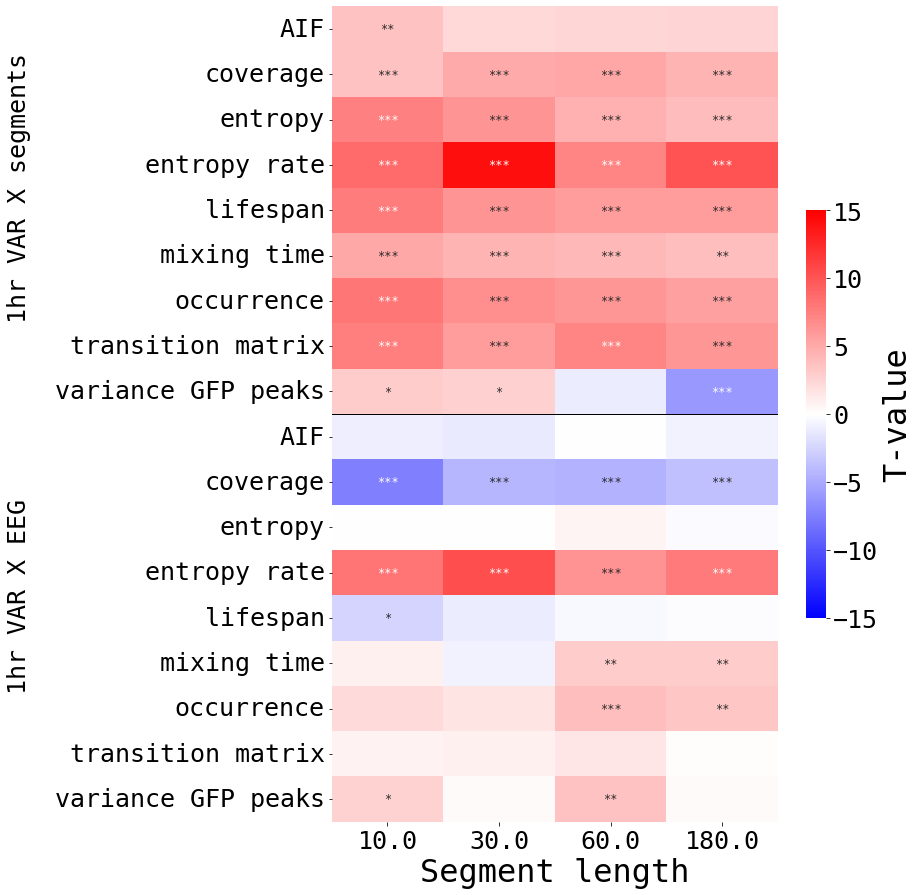

In [9]:
fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(111)
sns.heatmap(
    data_T,
    cbar_kws={"shrink": 0.5, "label": "T-value"},
    cmap="bwr",
    ax=ax,
    vmax=15,
    vmin=-15,
    annot=data_p,
    annot_kws={"size": 12},
    fmt="",
)
ax.set_ylabel("")
_ = ax.set_yticklabels(data_T.index.get_level_values(level=1).tolist(), rotation=0)
shift = int(len(data_T.index.get_level_values(0)) / len(data_T.index.get_level_values(0).unique()))
for pos, idx in enumerate(data_T.index.get_level_values(0).unique()):
    # idx = idx.replace(" X ", "\nX\n")
    # idx = idx.replace(" ", "\n")
    ax.text(-2.8, pos*shift + shift//2, idx, rotation=90, ha="center", va="center", size=25)
    if pos >= 1:
        ax.plot((0, 4), (pos*shift, pos*shift), "k", linewidth=1.0)
        
plt.savefig("VAR1hr_full_vs_EEG_and_vs_segments.pdf", transparent=True, bbox_inches="tight")